<a href="https://colab.research.google.com/github/madhuvanthi11/ML-Lab-Activity/blob/main/ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [2]:
data = pd.read_csv('data.csv')
print (data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
# Separate features (x) and target (y)
# Drop 'id' and 'Unnamed: 32' columns as they are not useful for training
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [12]:
results=[]
for i in [1,2,3,4,5]:
  model= KNeighborsClassifier(n_neighbors=i,metric='minkowski', p=2)
  model.fit(x_train, y_train)
  y_pred=model.predict (x_test)
  Accuracy_score=metrics.accuracy_score(y_test, y_pred)
  results.append (Accuracy_score)
print('KNN [ minkowski ]')
print('for n neighbor=5 : ')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix: ', conf_mat)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',
int (Accuracy_score*100),'%')
print('\n',classification_report(y_pred, y_test))
print(results)


KNN [ minkowski ]
for n neighbor=5 : 

 Confusion Matrix:  [[107   1]
 [  6  57]]
Accuracy Score :  0.9590643274853801
Accuracy in Percentage :  95 %

               precision    recall  f1-score   support

           B       0.99      0.95      0.97       113
           M       0.90      0.98      0.94        58

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[0.935672514619883, 0.9415204678362573, 0.935672514619883, 0.9473684210526315, 0.9590643274853801]


[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5 ]')]

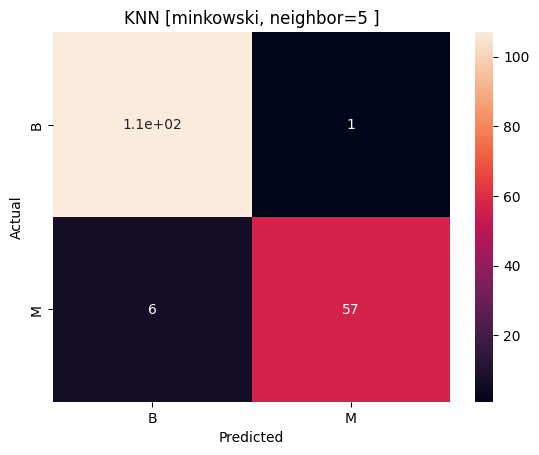

In [14]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='KNN [minkowski, neighbor=5 ]')

In [15]:
models = pd.DataFrame ( {
'n_neighbors': ['1', '2','3','4','5'],
'Accuracy Score':
[results[0],results[1], results[2],results[3],results[4]]})
models.sort_values (by='Accuracy Score')
print (models.to_string(index=False))

n_neighbors  Accuracy Score
          1        0.935673
          2        0.941520
          3        0.935673
          4        0.947368
          5        0.959064
